In [1]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# 1.Data Preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


file_path = '/content/drive/MyDrive/data_fraud_analyst_task.csv'
df = pd.read_csv(file_path)
df


,created_date,order_id,biker_id,accepted_at,delivered_at,distance,biker_phone,customer_phone,city,total_fare
0,2024-04-12,3746317213,23858217,2024-04-12 15:21:06,2024-04-12 15:45:06,5832,9648573143,9569897011,karaj,291600.0
1,2024-12-14,9697354961,42101643,2024-12-14 16:46:03,2024-12-14 17:22:03,104229,9311685375,9596250840,shiraz,4690305.0
2,2024-09-27,2181241943,20225038,2024-09-27 14:17:51,2024-09-27 14:46:51,81405,9622379733,9542430822,shiraz,3663225.0
3,2024-04-16,1958682846,78271263,2024-04-16 11:35:05,2024-04-16 12:06:05,160683,9553192522,9715876244,ilam,4820490.0
4,2024-03-12,4163119785,50824974,2024-03-12 11:50:16,2024-03-12 12:03:16,39243,9140176962,9768563033,ilam,1177290.0
...,...,...,...,...,...,...,...,...,...,...
499996,2024-01-03,5061456139,42745799,2024-01-03 17:27:35,2024-01-03 18:07:35,196821,9629391535,9129652504,isfahan,9250587.0
499997,2024-12-26,2513678017,78194146,2024-12-26 22:23:44,2024-12-26 23:01:44,95037,9845789564,9647347180,karaj,4751850.0
499998,2024-07-24,8199386003,59987989,2024-07-24 13:20:49,2024-07-24 13:33:49,191452,9561720146,9173999870,tehran,11487120.0
499999,2024-09-16,5593416102,44842406,2024-09-16 18:18:01,2024-09-16 18:48:01,43805,9300480957,9183910646,karaj,2190250.0


#2.Data Exploration

In [3]:
data_info = {
    "Shape": df.shape,
    "\nMissing Values": df.isnull().sum(),
    "Data Types": df.dtypes
}
data_info

{'Shape': (500001, 10),
 '\nMissing Values': created_date      0
 order_id          0
 biker_id          0
 accepted_at       0
 delivered_at      0
 distance          0
 biker_phone       0
 customer_phone    0
 city              0
 total_fare        0
 dtype: int64,
 'Data Types': created_date       object
 order_id            int64
 biker_id            int64
 accepted_at        object
 delivered_at       object
 distance            int64
 biker_phone         int64
 customer_phone      int64
 city               object
 total_fare        float64
 dtype: object}

## **Dataset Overview**

#### **Shape of the Dataset**
- **Rows**: 500,001  
- **Columns**: 10  


---

#### **Missing Values**
- **No missing values** are present in any column.  
  
  - All columns can be utilized directly without the need for additional preprocessing.


---

#### **Data Types**
The dataset consists of:
- **Datetime Columns** stored as `object` for now, should be converted to `datetime` for analysis
  


In [4]:
# Convert datetime columns
df['accepted_at'] = pd.to_datetime(df['accepted_at'])
df['delivered_at'] = pd.to_datetime(df['delivered_at'])
df['created_date'] = pd.to_datetime(df['created_date'])

In [5]:
df.describe(include='all')

,created_date,order_id,biker_id,accepted_at,delivered_at,distance,biker_phone,customer_phone,city,total_fare
count,500001,5.000010e+05,5.000010e+05,500001,500001,500001.000000,5.000010e+05,5.000010e+05,500001,5.000010e+05
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ahvaz,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83646,NaN
mean,2024-07-01 10:45:23.538552576,5.498769e+09,5.501814e+07,2024-07-02 01:46:13.976867328,2024-07-02 02:09:44.441806848,99945.387041,9.550163e+09,9.550064e+09,NaN,4.529766e+06
min,2024-01-01 00:00:00,1.000015e+09,1.000009e+07,2024-01-01 07:02:08,2024-01-01 07:14:45,1.000000,9.100007e+09,9.100000e+09,NaN,4.000000e+01
25%,2024-04-01 00:00:00,3.246150e+09,3.255103e+07,2024-04-01 17:12:18,2024-04-01 17:35:10,49816.000000,9.324971e+09,9.325074e+09,NaN,2.158680e+06
50%,2024-07-02 00:00:00,5.501174e+09,5.502032e+07,2024-07-02 07:44:22,2024-07-02 08:06:48,99895.000000,9.550250e+09,9.549899e+09,NaN,4.326120e+06
75%,2024-10-01 00:00:00,7.750549e+09,7.753811e+07,2024-10-01 08:01:41,2024-10-01 08:24:13,150053.000000,9.775027e+09,9.774969e+09,NaN,6.655860e+06
max,2024-12-31 00:00:00,9.999992e+09,9.999970e+07,2024-12-31 22:57:50,2024-12-31 23:30:43,200000.000000,9.999999e+09,9.999995e+09,NaN,1.200000e+07


## **Descriptive Statistics Summary**



---

#### **Key Observations**

1. **`created_date`, `accepted_at`, `delivered_at`**:
   - **Date Range**: The dataset spans from `2024-01-01` to `2024-12-31`, covering a complete year.
   - **Mean Timestamp**:
     - `created_date`: Mid-year (2024-07-01).
     - `accepted_at`: Average acceptance time (2024-07-02, ~01:46 AM).
     - `delivered_at`: Slightly delayed compared to `accepted_at` (2024-07-02, ~02:09 AM).


2. **`distance`**:
   - **Statistics**:
     - **Mean**: ~99.9 km.
     - **Min**: 1 meter, indicating potentially anomalous short deliveries.
     - **Max**: 200 km, which might represent long-distance or outlier orders.
   - **Standard Deviation**: ~57.7 km, reflecting high variability in delivery lengths.



3. **`city`**:
   - **Unique Values**: 6 cities are represented in the dataset.
   - **Most Common City**: `ahvaz` appears the most frequently with 83,646 records.
   

4. **`total_fare`**:
   - **Statistics**:
     - **Mean**: 4.53 million (currency unspecified).
     - **Min**: 40, which could indicate unusually low fares.
     - **Max**: 12 million, highlighting potential outliers or large orders.
   - **Standard Deviation**: ~2.6 million, indicating significant variability in fares.

---

#### **Insights for Fraud Analysis**
1. **Time-Based Metrics**:
   - Analyze `accepted_at` and `delivered_at` to detect timestamp inconsistencies.
   

2. **Distance**:
   - Extremely short distances (1 meter)  can signal fraudulent activity.

3. **Phone Numbers**:
   - Analyze `biker_phone` and `customer_phone` for potential duplication or collaborative fraud.




#3.Fraud Detection Criteria

In [10]:


# 1. Inconsistent Timestamps: Delivery timestamp should be after acceptance timestamp
df['timestamp_issue'] = df['delivered_at'] < df['accepted_at']

# 2. Unrealistic Distance: Zero distance with a positive fare is suspicious
df['unrealistic_distance'] = (df['distance'] <= 0) & (df['total_fare'] > 0)

# 3. Duplicate Phone Numbers: Biker's phone number matches customer's phone number
df['same_phone_numbers'] = df['biker_phone'] == df['customer_phone']

# 4. Abnormal Fares: Calculate z-score for fare per meter
df['fare_per_meter'] = df['total_fare'] / df['distance'].replace(0, pd.NA)# Avoid division errors for rows where 'distance' is zero
df['fare_zscore'] = (df['fare_per_meter'] - df['fare_per_meter'].mean(skipna=True)) / df['fare_per_meter'].std(skipna=True)
df['abnormal_fare'] = (df['fare_zscore'].abs() > 3)  # Z-scores greater than 3 or less than -3 are anomalies

# 5. Unusual Delivery Times: Very short (<2 min) or excessively long (>3 hours) delivery times are suspicious
df['delivery_time_minutes'] = (df['delivered_at'] - df['accepted_at']).dt.total_seconds() / 60
df['unusual_delivery_time'] = (df['delivery_time_minutes'] < 2) | (df['delivery_time_minutes'] > 180)

# 6. Unrealistic Delivery Speed
df['distance_km'] = df['distance'] / 1000  # Convert distance from meters to kilometers
df['delivery_time_hours'] = (df['delivery_time_minutes'] + 1) / 60  # Convert time from minutes to hours, add 1 to avoid division by zero

#Calculate Delivery Speed in km/h
df['delivery_speed_kmh'] = df['distance_km'] / df['delivery_time_hours']
df['unrealistic_speed'] = df['delivery_speed_kmh'] > 120

# 7. Short Distance Anomalies: Distance < 5 meters with high fares or long times is suspicious
df['short_distance_anomaly'] = ((df['distance'] < 5) & (df['delivery_time_minutes'] > 5))

# Combine all fraud criteria into a single 'fraud_flag' column
df['fraud_flag'] = df[['timestamp_issue', 'unrealistic_distance', 'same_phone_numbers',
                       'abnormal_fare', 'unusual_delivery_time', 'unrealistic_speed',
                        'short_distance_anomaly']].any(axis=1)


fraud_summary = {
    "Inconsistent Timestamps": df['timestamp_issue'].sum(),
    "Unrealistic Distance": df['unrealistic_distance'].sum(),
    "Duplicate Phone Numbers": df['same_phone_numbers'].sum(),
    "Abnormal Fares": df['abnormal_fare'].sum(),
    "Unusual Delivery Times": df['unusual_delivery_time'].sum(),
   "Unrealistic Speeds": df['unrealistic_speed'].sum(),
    "Short Distance Anomalies": df['short_distance_anomaly'].sum(),
    "Total Fraud Cases": df['fraud_flag'].sum()
}


print("Fraud Detection Summary:")
for criterion, count in fraud_summary.items():
    print(f"{criterion}: {count}")


Fraud Detection Summary:
Inconsistent Timestamps: 0
Unrealistic Distance: 0
Duplicate Phone Numbers: 2257
Abnormal Fares: 0
Unusual Delivery Times: 10121
Unrealistic Speeds: 376937
Short Distance Anomalies: 15
Total Fraud Cases: 377669


#### **Key Insights**
- **Unrealistic Speeds** dominate the fraud detection criteria, accounting for approximately 99.8% of the total flagged cases. This might indicate a need to refine the speed threshold or review the data quality.




اگر در نظر بگیریم که اعداد دیتا واقعی هستند ، من فکر میکنم این موضوع بخاطر **طرح های تشویقی  **برای رانندگان است که باید در یک بازه زمانی خاص ، تعداد سفر مشخصی و انجام بدن تا به جایزه برسن ، بخاطر همین راننده ها زودتر از رسیدن به مقصد ، اعلام دلیور کردن میکنن و این باعث شده نسبت مسافت و زمان غیر منطقی باشه و این سرعت ها بدست بیاد ، من سرعت یک موتور رو ۱۲۰ درنظر گرفتم که تازه حالت خوشبینانه است و حداکثر سرعت ممکن موتور های کویر که معمولا استفاده میشن رو در نظر گرفتم  ،(طبق تحقیقات من موتور های پیک حتی در اتوبان ها هم حداکثر ۹۰ کیلومتر برساعت سرعت دارند)

تایم های زیر ۲دقیقه که شامل صفر و یک میشن هم برای یک دلیوری غیرمنطقی بنظر میان ،همچنین شماره های مشترک پیک و مشتری و داشتیم و احتمالا به همان دلایل بالا
اتفاق افتاده اند

بنظرم راننده ها ناآگاهن که چگونه تقلب اونا مشخص میشه و اگر بدونن احتمالا تلاش
کمتری در این راستا انجام میدن

## Fraud Proportion in Overall Data

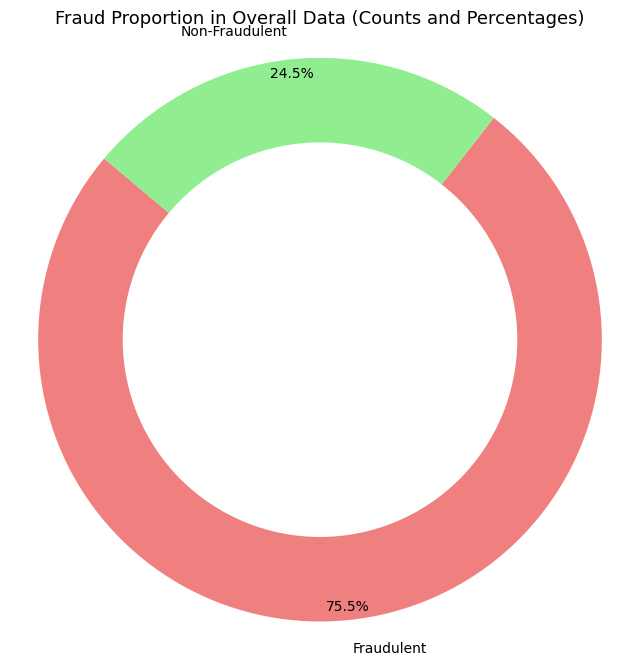

In [11]:
if df['fraud_flag'].isin([True, False]).all():

    fraud_counts = df['fraud_flag'].value_counts()
    labels = fraud_counts.index.map({False: 'Non-Fraudulent', True: 'Fraudulent'})


    plt.figure(figsize=(8, 8))
    plt.pie(
        fraud_counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=['lightcoral', 'lightgreen'],
        pctdistance=0.95
    )


    center_circle = plt.Circle((0, 0), 0.70, fc='white')
    plt.gca().add_artist(center_circle)


    plt.title("Fraud Proportion in Overall Data (Counts and Percentages)", fontsize=13)
    plt.axis('equal')
    plt.show()
else:
    print("The 'fraud_flag' column contains unexpected values. Please clean your data.")


**Fraudulent Deliveries**:
   - Account for **75.5%** of all deliveries.
   - This is a significant portion, indicating potential widespread issues in operations or data reporting.


## **در ادامه نمونه هایی از ریکورد های مربوط به هر معیار آورده شده**

In [12]:
df_unreal_speed = df[df['unrealistic_speed']]


print(f"Number of rows with 'unrealistic_speed' as True: {df_unreal_speed.shape[0]}")
print("\nFiltered DataFrame:")
df_unreal_speed.head()

Number of rows with 'unrealistic_speed' as True: 376937

Filtered DataFrame:


,created_date,order_id,biker_id,accepted_at,delivered_at,distance,biker_phone,customer_phone,city,total_fare,...,fare_zscore,abnormal_fare,delivery_time_minutes,unusual_delivery_time,distance_km,delivery_time_hours,delivery_speed_kmh,unrealistic_speed,short_distance_anomaly,fraud_flag
1,2024-12-14,9697354961,42101643,2024-12-14 16:46:03,2024-12-14 17:22:03,104229,9311685375,9596250840,shiraz,4690305.0,...,-0.036105,False,36.0,False,104.229,0.616667,169.020000,True,False,True
2,2024-09-27,2181241943,20225038,2024-09-27 14:17:51,2024-09-27 14:46:51,81405,9622379733,9542430822,shiraz,3663225.0,...,-0.036105,False,29.0,False,81.405,0.500000,162.810000,True,False,True
3,2024-04-16,1958682846,78271263,2024-04-16 11:35:05,2024-04-16 12:06:05,160683,9553192522,9715876244,ilam,4820490.0,...,-1.675662,False,31.0,False,160.683,0.533333,301.280625,True,False,True
4,2024-03-12,4163119785,50824974,2024-03-12 11:50:16,2024-03-12 12:03:16,39243,9140176962,9768563033,ilam,1177290.0,...,-1.675662,False,13.0,False,39.243,0.233333,168.184286,True,False,True
6,2024-01-21,2812140441,77078933,2024-01-21 20:16:32,2024-01-21 20:24:32,44265,9142941056,9501313813,ilam,1327950.0,...,-1.675662,False,8.0,False,44.265,0.150000,295.100000,True,False,True


In [13]:
# Filter the DataFrame to only include rows where same_phone_numbers is True
df_same_phone = df[df['same_phone_numbers']]

# Display the updated DataFrame
print(f"Number of rows with 'same_phone_numbers' as True: {df_same_phone.shape[0]}")
print("\nFiltered DataFrame:")
df_same_phone.head()

Number of rows with 'same_phone_numbers' as True: 2257

Filtered DataFrame:


,created_date,order_id,biker_id,accepted_at,delivered_at,distance,biker_phone,customer_phone,city,total_fare,...,fare_zscore,abnormal_fare,delivery_time_minutes,unusual_delivery_time,distance_km,delivery_time_hours,delivery_speed_kmh,unrealistic_speed,short_distance_anomaly,fraud_flag
137,2024-06-27,1311570307,21753564,2024-06-27 16:27:55,2024-06-27 16:48:55,61663,9223703562,9223703562,ahvaz,2466520.0,...,-0.582624,False,21.0,False,61.663,0.366667,168.171818,True,False,True
879,2024-12-20,6443749394,56207880,2024-12-20 19:49:20,2024-12-20 20:06:20,57242,9143342924,9143342924,isfahan,2690374.0,...,0.182502,False,17.0,False,57.242,0.300000,190.806667,True,False,True
954,2024-12-15,4067213499,87337484,2024-12-15 22:05:09,2024-12-15 22:21:09,141509,9782531450,9782531450,ilam,4245270.0,...,-1.675662,False,16.0,False,141.509,0.283333,499.443529,True,False,True
963,2024-08-16,1225447588,87479057,2024-08-16 13:37:41,2024-08-16 14:13:41,121492,9103888040,9103888040,tehran,7289520.0,...,1.603451,False,36.0,False,121.492,0.616667,197.014054,True,False,True
1214,2024-02-18,9455610447,13149346,2024-02-18 15:23:39,2024-02-18 15:50:39,35376,9494702825,9494702825,shiraz,1591920.0,...,-0.036105,False,27.0,False,35.376,0.466667,75.805714,False,False,True


In [14]:
df_unsutime = df[df['unusual_delivery_time']]


print(f"Number of rows with 'unusual_delivery_time' as True: {df_unsutime.shape[0]}")
print("\nFiltered DataFrame:")
df_unsutime.head()

Number of rows with 'unusual_delivery_time' as True: 10121

Filtered DataFrame:


,created_date,order_id,biker_id,accepted_at,delivered_at,distance,biker_phone,customer_phone,city,total_fare,...,fare_zscore,abnormal_fare,delivery_time_minutes,unusual_delivery_time,distance_km,delivery_time_hours,delivery_speed_kmh,unrealistic_speed,short_distance_anomaly,fraud_flag
62,2024-12-25,2948728483,14687224,2024-12-25 21:12:31,2024-12-25 21:13:31,67528,9113642087,9903025747,ilam,2025840.0,...,-1.675662,False,1.0,True,67.528,0.033333,2025.84,True,False,True
100,2024-05-15,4700855390,75503573,2024-05-15 07:12:46,2024-05-15 07:13:46,43878,9324049398,9494607274,tehran,2632680.0,...,1.603451,False,1.0,True,43.878,0.033333,1316.34,True,False,True
162,2024-05-13,1041531046,54098915,2024-05-13 10:33:46,2024-05-13 10:33:46,181663,9320039223,9495832868,ilam,5449890.0,...,-1.675662,False,0.0,True,181.663,0.016667,10899.78,True,False,True
173,2024-07-08,4713453204,40657437,2024-07-08 16:13:42,2024-07-08 16:14:42,57723,9733187017,9892004111,shiraz,2597535.0,...,-0.036105,False,1.0,True,57.723,0.033333,1731.69,True,False,True
204,2024-07-05,4642197907,61690648,2024-07-05 17:35:05,2024-07-05 17:36:05,44482,9794315535,9989297002,karaj,2224100.0,...,0.510413,False,1.0,True,44.482,0.033333,1334.46,True,False,True


In [15]:
df_shortdistance = df[df['short_distance_anomaly']]


print(f"Number of rows with 'short_distance_anomaly' as True: {df_shortdistance.shape[0]}")
print("\nFiltered DataFrame:")
df_shortdistance.head()

Number of rows with 'short_distance_anomaly' as True: 15

Filtered DataFrame:


,created_date,order_id,biker_id,accepted_at,delivered_at,distance,biker_phone,customer_phone,city,total_fare,...,fare_zscore,abnormal_fare,delivery_time_minutes,unusual_delivery_time,distance_km,delivery_time_hours,delivery_speed_kmh,unrealistic_speed,short_distance_anomaly,fraud_flag
2048,2024-08-21,5891831621,13284800,2024-08-21 10:24:23,2024-08-21 10:46:23,3,9604694379,9238320959,ilam,90.0,...,-1.675662,False,22.0,False,0.003,0.383333,0.007826,False,True,True
11257,2024-09-03,7903185896,39274557,2024-09-03 10:49:07,2024-09-03 11:08:07,4,9869414541,9425761251,isfahan,188.0,...,0.182502,False,19.0,False,0.004,0.333333,0.012000,False,True,True
30030,2024-12-28,7840338299,17292305,2024-12-28 19:26:20,2024-12-28 19:34:20,1,9642191705,9449565924,tehran,60.0,...,1.603451,False,8.0,False,0.001,0.150000,0.006667,False,True,True
52173,2024-08-30,3845394119,37033713,2024-08-30 16:07:44,2024-08-30 16:45:44,1,9426089552,9521328525,shiraz,45.0,...,-0.036105,False,38.0,False,0.001,0.650000,0.001538,False,True,True
54111,2024-07-07,2258277701,70721630,2024-07-07 09:03:13,2024-07-07 09:20:13,4,9139088270,9134382446,ahvaz,160.0,...,-0.582624,False,17.0,False,0.004,0.300000,0.013333,False,True,True


## Fraud Contribution by Criterion

<Figure size 1000x600 with 0 Axes>

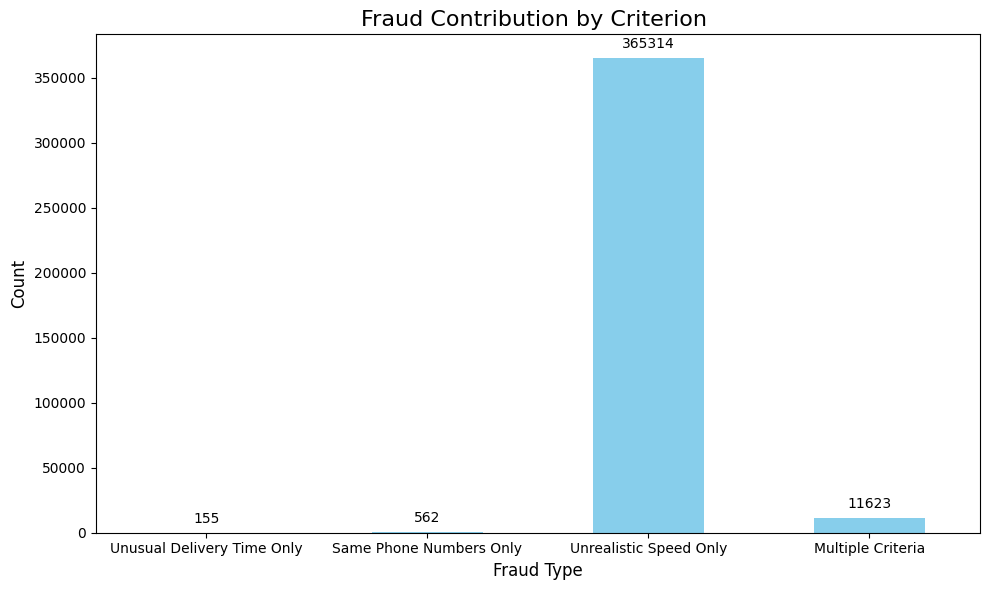

Fraud Contribution Breakdown:
Unusual Delivery Time Only: 155
Same Phone Numbers Only: 562
Unrealistic Speed Only: 365314
Multiple Criteria: 11623
Total Fraud Cases: 377669


In [16]:
total_fraud_cases = df['fraud_flag'].sum()

# Calculate counts for each individual criterion
fraud_criteria_counts = {
    "Unusual Delivery Time Only": df[(df['unusual_delivery_time']) &
                                     (~df['same_phone_numbers']) &
                                     (~df['unrealistic_speed'])].shape[0],
    "Same Phone Numbers Only": df[(df['same_phone_numbers']) &
                                  (~df['unusual_delivery_time']) &
                                  (~df['unrealistic_speed'])].shape[0],
    "Unrealistic Speed Only": df[(df['unrealistic_speed']) &
                                 (~df['same_phone_numbers']) &
                                 (~df['unusual_delivery_time'])].shape[0],
    "Multiple Criteria": df[(df['fraud_flag']) &
                            ((df['same_phone_numbers'] & df['unusual_delivery_time']) |
                             (df['same_phone_numbers'] & df['unrealistic_speed']) |
                             (df['unusual_delivery_time'] & df['unrealistic_speed']))].shape[0],
}


fraud_criteria_df = pd.DataFrame.from_dict(fraud_criteria_counts, orient='index', columns=['Count'])


plt.figure(figsize=(10, 6))
ax = fraud_criteria_df.plot(kind='bar', stacked=False, color='skyblue', legend=False, figsize=(10, 6))

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')


plt.title("Fraud Contribution by Criterion ", fontsize=16)
plt.xlabel("Fraud Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


print("Fraud Contribution Breakdown:")
for criterion, count in fraud_criteria_counts.items():
    print(f"{criterion}: {count}")
print(f"Total Fraud Cases: {total_fraud_cases}")



#### **Observations**
1. **Unrealistic Speeds as a Major Contributor**:
   - The detection of **365,314 cases** flagged for unrealistic speeds may indicate a pattern where bikers aim to complete as many deliveries as possible in a short period, potentially incentivized by snapp prizes.

2. **Context of Prize Incentives**:
   - Snapp often set challenges, such as completing a certain number of deliveries within a specific timeframe, to incentivize bikers. While this motivates performance, it may also lead to behaviors that compromise data integrity, such as:
     - Marking deliveries as completed without actually performing them.
     - Collaboration among bikers to share accounts and meet delivery targets.
     - Exaggerating delivery speeds by misreporting timestamps or delivery paths.

3. **Same Phone Numbers and Collaboration**:
   - **562 cases** of same phone numbers indicate potential collaboration. Bikers might share accounts or phones to pool deliveries under one account and claim prizes.

4. **Unusual Delivery Times**:
   - **155 cases** flagged for unusual delivery times may also reflect attempts to artificially inflate the number of completed deliveries within the prize window.

---

#### **Recommendations for Investigating Prize-Driven Fraud**
1. **Analyze Delivery Timing Patterns**:
   - Compare delivery times during prize periods with normal operational periods to identify abnormal patterns.

2. **Focus on Unrealistic Speed Cases**:
   - Investigate bikers flagged for speeds exceeding **120 km/h**, especially during prize campaign periods.

3. **Monitor Collaboration Indicators**:
   - Look for overlapping phone numbers, shared devices, or repeated collaboration between specific biker IDs.

4. **Audit Prize Eligibility**:
   - Introduce additional validation steps for prize eligibility:
     - Use GPS tracking to validate delivery paths and timings.
     - Monitor bikers who consistently win prizes for anomalies in their delivery data.

5. **Implement Penalty Mechanisms**:
   - Introduce penalties for fraudulent activities, such as disqualification from prize schemes or temporary bans, to discourage misuse.




## Features Correlation with Fraud Flag

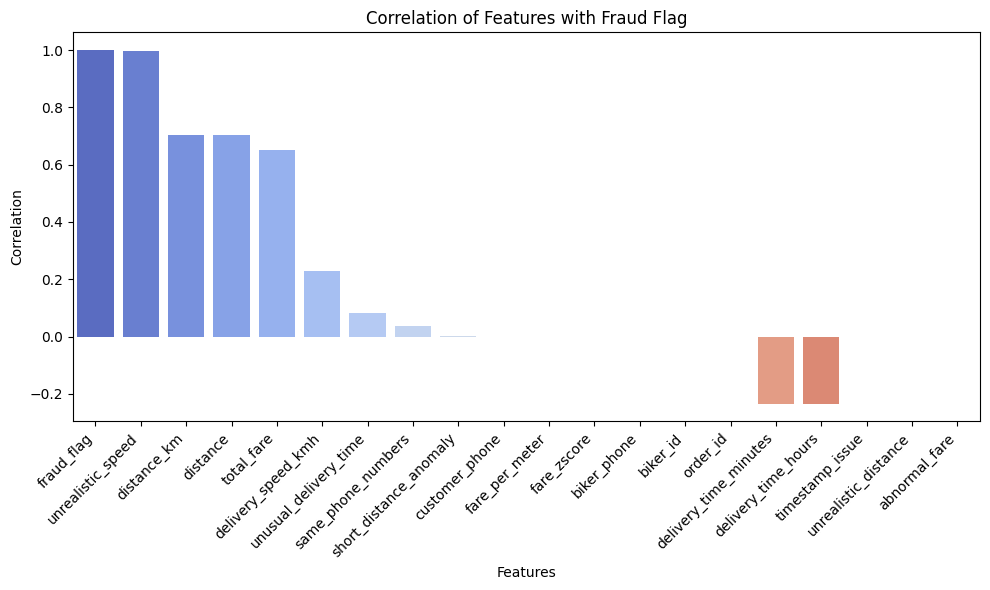

In [17]:
heatmap_df = df.copy()

# Convert non-numeric (boolean) columns to numeric (0 for False, 1 for True)
bool_columns = heatmap_df.select_dtypes(include=['bool']).columns
heatmap_df[bool_columns] = heatmap_df[bool_columns].astype(int)


numeric_df = heatmap_df.select_dtypes(include=[np.number])


fraud_correlations = numeric_df.corr()['fraud_flag'].sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_correlations.index, y=fraud_correlations.values, palette='coolwarm')
plt.title('Correlation of Features with Fraud Flag')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Correlation')
plt.xlabel('Features')
plt.tight_layout()
plt.show()




#### **Insights**
- **Unrealistic Speed as a Key Metric**:
   - This feature should be prioritized for fraud detection as it captures the most significant anomaly contributing to flagged cases.
- **Distance and delivery time**:
   - These features are also critical for identifying fraud and may warrant further investigation to uncover patterns.
- **Weak Predictors**:
   - Features with low correlation values, like `abnormal_fare`, may not be immediately useful for fraud detection and could be deprioritized.

In [18]:
# Keep only rows where fraud_flag is True
df_fraud = df[df['fraud_flag']]

## Top 10 Fraudulent Bikers

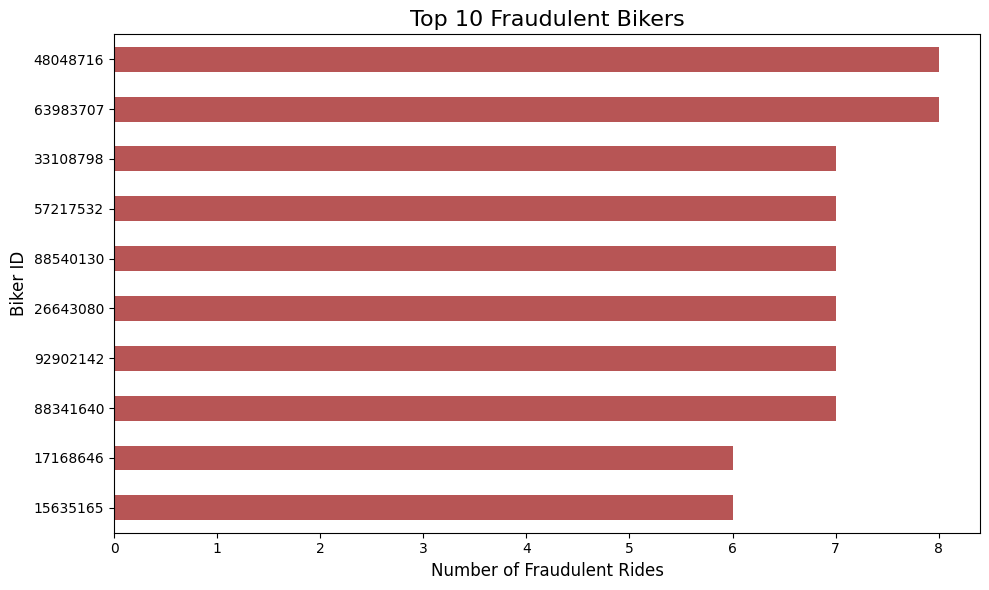

In [19]:
top_10_bikers = df_fraud['biker_id'].value_counts().head(10)


fig, ax = plt.subplots(figsize=(10, 6))
top_10_bikers.plot(kind='barh', color='brown', alpha=0.8, ax=ax)

plt.title("Top 10 Fraudulent Bikers", fontsize=16)
plt.xlabel("Number of Fraudulent Rides", fontsize=12)
plt.ylabel("Biker ID", fontsize=12)
plt.gca().invert_yaxis()  # Reverse the order for better readability

plt.tight_layout()
plt.show()


## Fraud Distribution by City

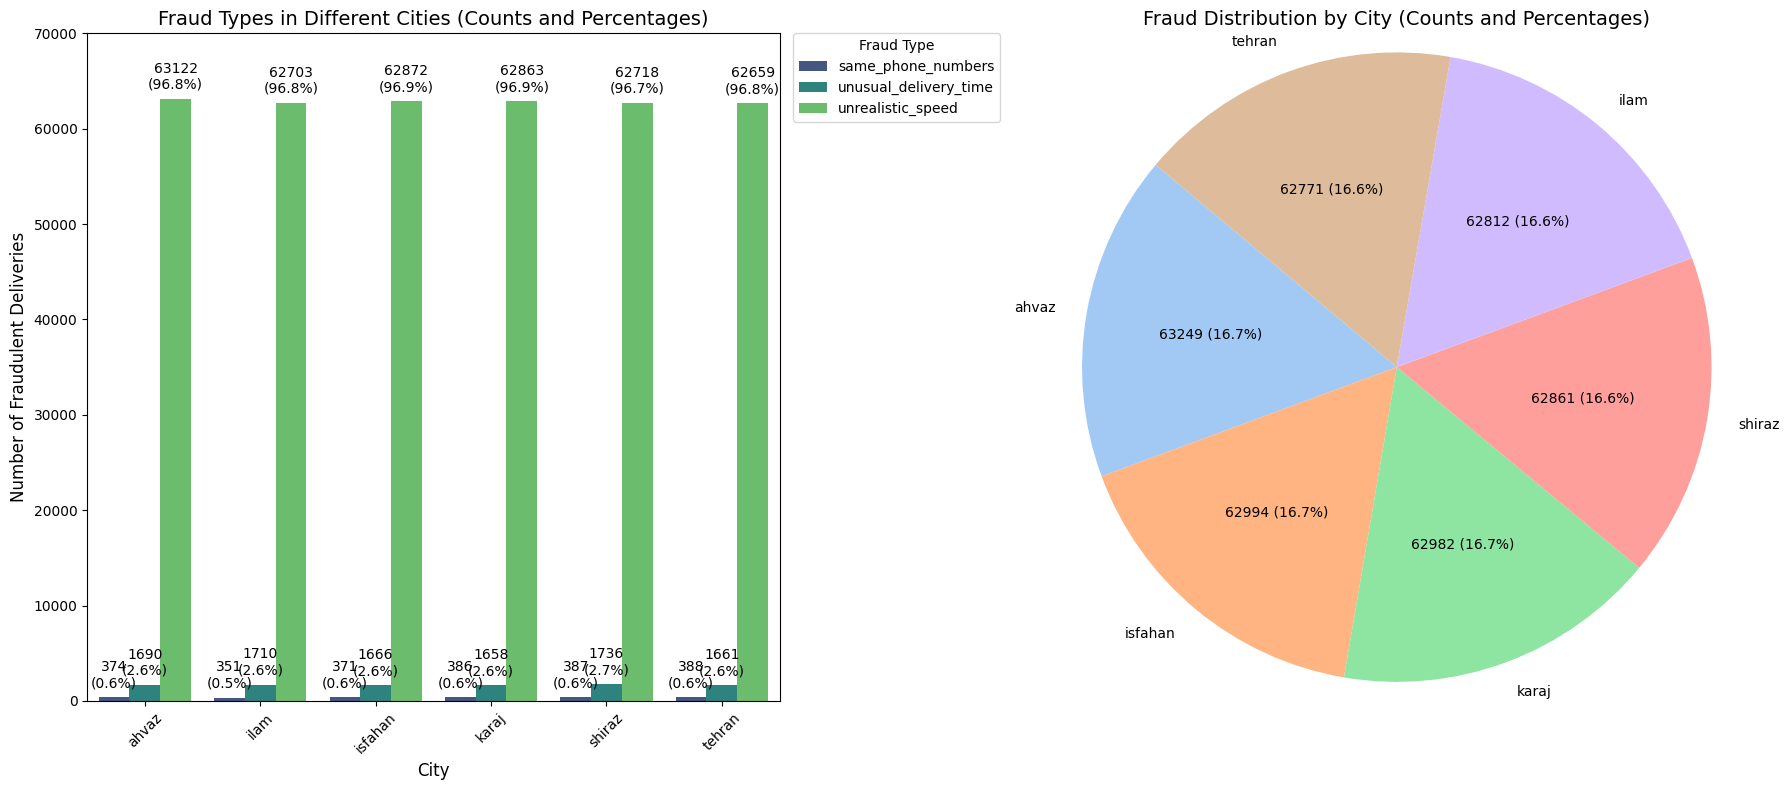

In [21]:
fraud_by_city = df_fraud.groupby('city').agg({
    'same_phone_numbers': 'sum',
    'unusual_delivery_time': 'sum',
    'unrealistic_speed': 'sum'
}).reset_index()


fraud_by_city['total_fraud'] = fraud_by_city[['same_phone_numbers', 'unusual_delivery_time', 'unrealistic_speed']].sum(axis=1)
fraud_by_city['same_phone_numbers_pct'] = (fraud_by_city['same_phone_numbers'] / fraud_by_city['total_fraud']) * 100
fraud_by_city['unusual_delivery_time_pct'] = (fraud_by_city['unusual_delivery_time'] / fraud_by_city['total_fraud']) * 100
fraud_by_city['unrealistic_speed_pct'] = (fraud_by_city['unrealistic_speed'] / fraud_by_city['total_fraud']) * 100


fraud_melted = fraud_by_city.melt(
    id_vars='city',
    value_vars=['same_phone_numbers', 'unusual_delivery_time', 'unrealistic_speed'],
    var_name='Fraud_Type',
    value_name='Count'
)

fraud_pct_melted = fraud_by_city.melt(
    id_vars='city',
    value_vars=['same_phone_numbers_pct', 'unusual_delivery_time_pct', 'unrealistic_speed_pct'],
    var_name='Fraud_Type_Pct',
    value_name='Percentage'
)


fraud_melted['Percentage'] = fraud_pct_melted['Percentage']


fraud_by_city_pie = df_fraud['city'].value_counts()


def autopct_format(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))
    return f"{absolute} ({pct:.1f}%)"


fig, axes = plt.subplots(1, 2, figsize=(18, 8))

#Grouped Bar Chart
sns.barplot(data=fraud_melted, x='city', y='Count', hue='Fraud_Type', palette='viridis', ax=axes[0])


axes[0].set_ylim(0, 70000)
for p, percentage in zip(axes[0].patches, fraud_melted['Percentage']):
    axes[0].annotate(
        f"{int(p.get_height())}\n({percentage:.1f}%)",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points'
    )


axes[0].set_title('Fraud Types in Different Cities (Counts and Percentages)', fontsize=14)
axes[0].set_xlabel('City', fontsize=12)
axes[0].set_ylabel('Number of Fraudulent Deliveries', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)


axes[0].legend(title='Fraud Type', loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

#Pie Chart
if not fraud_by_city_pie.empty:
    axes[1].pie(
        fraud_by_city_pie,
        labels=fraud_by_city_pie.index,
        autopct=lambda pct: autopct_format(pct, fraud_by_city_pie.values),
        startangle=140,
        colors=sns.color_palette("pastel")
    )
    axes[1].set_title("Fraud Distribution by City (Counts and Percentages)", fontsize=14)
    axes[1].axis('equal')
else:
    axes[1].text(0.5, 0.5, "No fraud cases to display for cities.", ha='center', va='center', fontsize=12)


plt.tight_layout()
plt.show()


#### **Observations from Bar Chart (Fraud Types in Different Cities)**
1. **Prevalence of Unrealistic Speed**:
   - Unrealistic speed is overwhelmingly the dominant type of fraud across all cities, accounting for **96.7% to 96.9%** of fraudulent deliveries.


2. **Low Incidence of Other Fraud Types**:
   - `Same Phone Numbers` and `Unusual Delivery Time` collectively make up a small fraction (**2.6%-2.7%**) of fraudulent cases.
   - These types of fraud might represent edge cases or less frequently used fraudulent tactics.

3. **City-Wise Consistency**:
   - The proportion of fraud types remains consistent across cities, indicating a similar pattern of fraud behavior regardless of location.

#### **Observations from Pie Chart (Fraud Distribution by City)**
1. **Even Distribution Across Cities**:
   - Fraudulent deliveries are almost evenly distributed among the six cities, with each city contributing approximately **16.6%-16.7%** of the total fraud cases.
   - This even split indicates no particular city is disproportionately contributing to the fraud problem.

2. **Top Fraudulent Cities**:
   - Tehran, Ahvaz, and Shiraz lead in total fraudulent cases, but the difference between cities is negligible.

---

#### **Insights**
1. **Focus on Unrealistic Speed**:
   - Since unrealistic speed constitutes the vast majority of fraud cases, it should be the primary focus for fraud detection and prevention strategies.
2. **Uniform Behavior**:
   - The similar fraud patterns across cities suggest that bikers may be using shared tactics, possibly incentivized by company-wide policies like delivery prizes.



## Temporal analysis

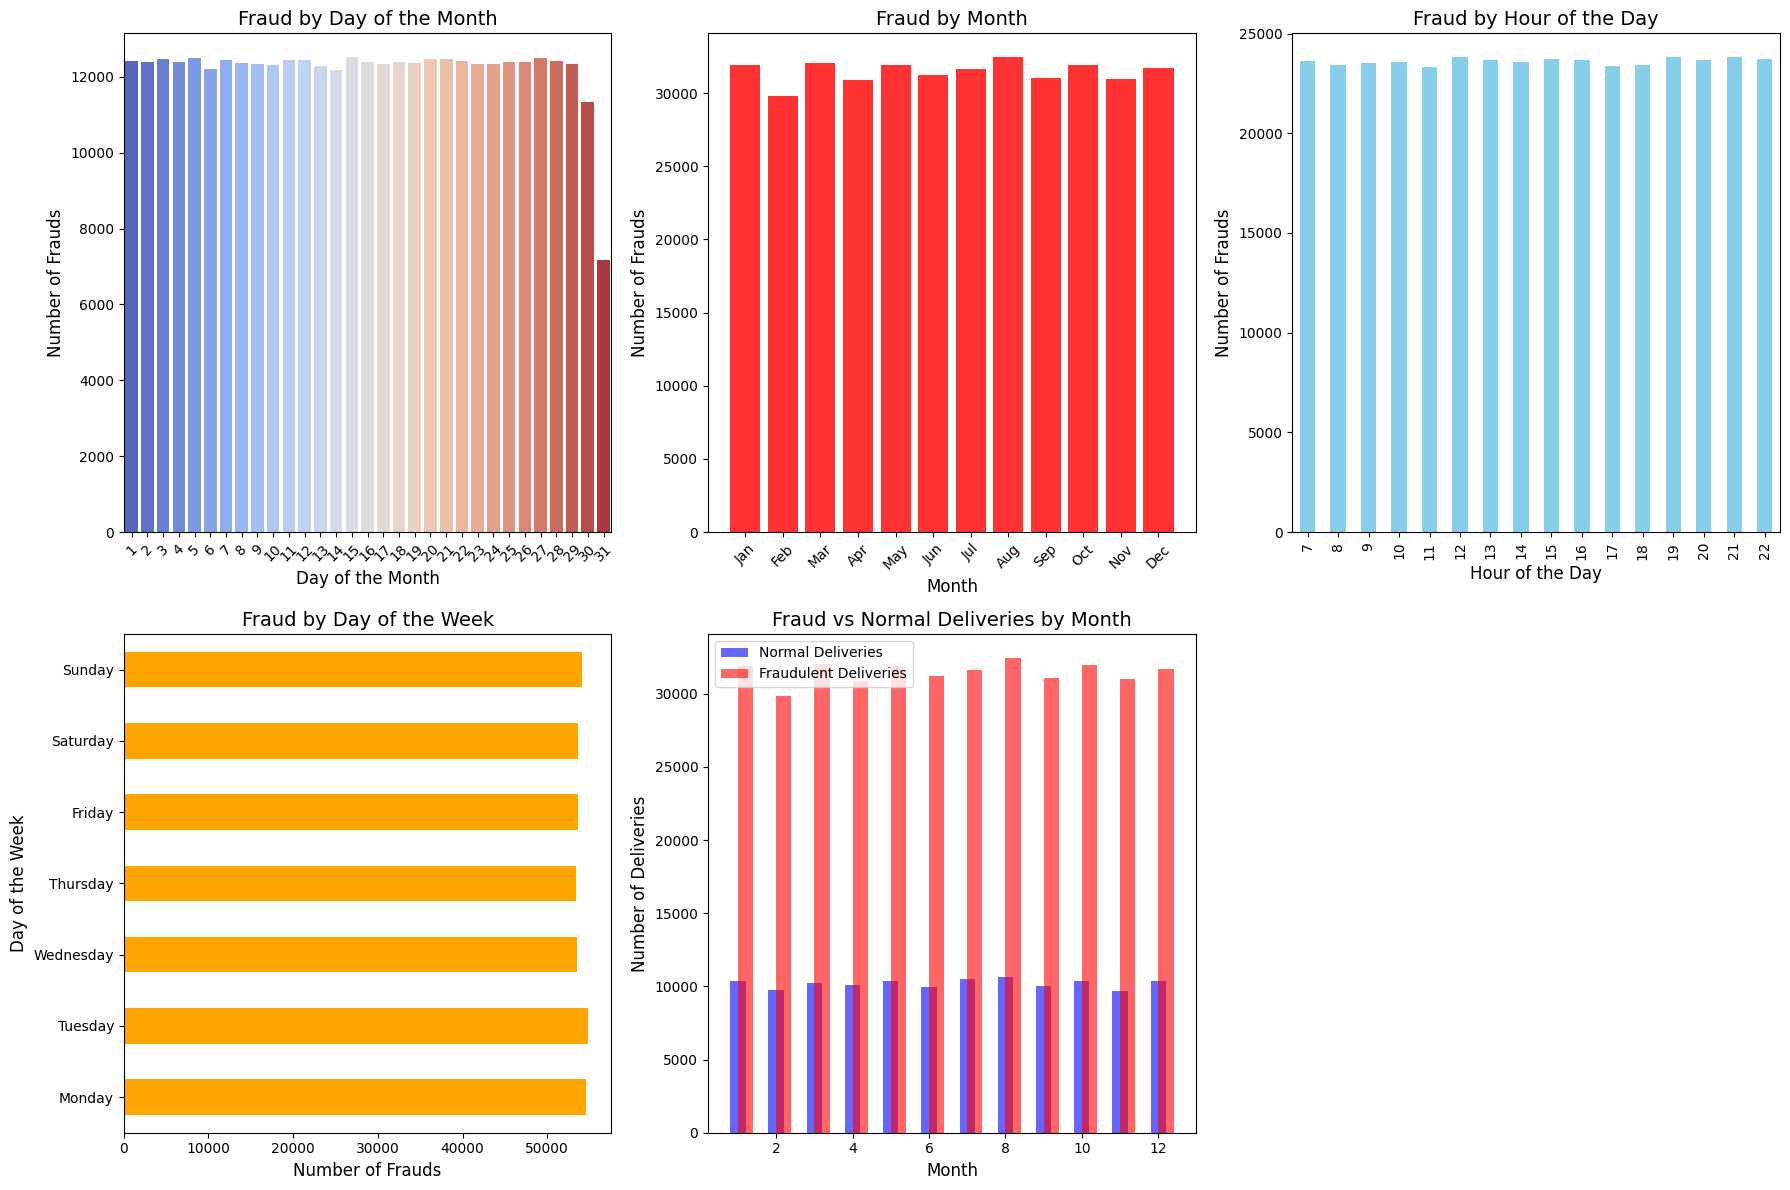

In [25]:
df['day_of_month'] = df['created_date'].dt.day
df['month_of_year'] = df['created_date'].dt.month


fraud_data = df[df['fraud_flag']]


fraud_by_day = fraud_data['day_of_month'].value_counts().sort_index()
fraud_by_month = fraud_data.groupby('month_of_year').size()

df_fraud['hour_of_day'] = df_fraud['accepted_at'].dt.hour
df_fraud['day_of_week'] = df_fraud['created_date'].dt.day_name()

fraud_by_hour = df_fraud['hour_of_day'].value_counts().sort_index()
fraud_by_weekday = df_fraud['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Subplots: 2 rows, 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

#  Row 1, Col 1: Fraud by Day of the Month
sns.barplot(x=fraud_by_day.index, y=fraud_by_day.values, palette="coolwarm", ax=axes[0, 0])
axes[0, 0].set_title("Fraud by Day of the Month", fontsize=14)
axes[0, 0].set_xlabel("Day of the Month", fontsize=12)
axes[0, 0].set_ylabel("Number of Frauds", fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

#  Row 1, Col 2: Fraud by Month
axes[0, 1].bar(range(1, 13), fraud_by_month, color='red', alpha=0.8)
axes[0, 1].set_title("Fraud by Month", fontsize=14)
axes[0, 1].set_xlabel("Month", fontsize=12)
axes[0, 1].set_ylabel("Number of Frauds", fontsize=12)
axes[0, 1].set_xticks(range(1, 13))
axes[0, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

#  Row 1, Col 3: Fraud by Hour of the Day
fraud_by_hour.plot(kind='bar', color='skyblue', ax=axes[0, 2])
axes[0, 2].set_title("Fraud by Hour of the Day", fontsize=14)
axes[0, 2].set_xlabel("Hour of the Day", fontsize=12)
axes[0, 2].set_ylabel("Number of Frauds", fontsize=12)

#  Row 2, Col 1: Fraud by Day of the Week
fraud_by_weekday.plot(kind='barh', color='orange', ax=axes[1, 0])
axes[1, 0].set_title("Fraud by Day of the Week", fontsize=14)
axes[1, 0].set_xlabel("Number of Frauds", fontsize=12)
axes[1, 0].set_ylabel("Day of the Week", fontsize=12)

#  Row 2, Col 2: Fraud vs Normal by Month
fraud_counts = df[df['fraud_flag']].groupby('month_of_year').size()
normal_counts = df[~df['fraud_flag']].groupby('month_of_year').size()
months = range(1, 13)
fraud_counts = fraud_counts.reindex(months, fill_value=0)
normal_counts = normal_counts.reindex(months, fill_value=0)
axes[1, 1].bar(months, normal_counts, color='blue', alpha=0.6, label='Normal Deliveries', width=0.4, align='center')
axes[1, 1].bar(months, fraud_counts, color='red', alpha=0.6, label='Fraudulent Deliveries', width=0.4, align='edge')
axes[1, 1].set_title("Fraud vs Normal Deliveries by Month", fontsize=14)
axes[1, 1].set_xlabel("Month", fontsize=12)
axes[1, 1].set_ylabel("Number of Deliveries", fontsize=12)
axes[1, 1].legend()

#  Row 2, Col 3: empty
axes[1, 2].axis('off')
axes[1, 2].text(0.5, 0.5, "", ha='center', va='center', fontsize=14)

plt.tight_layout()
plt.show()


### **Insights**
1. **Uniform Fraud Trends**:
   - Fraudulent behavior does not vary significantly by time (day, week, or month), highlighting systemic issues rather than temporal spikes.
2. **End-of-Month Drop**:
   - There is a noticeable reduction in fraud cases toward the month's end because only 6 months of the year have 31 days.

## Fraudulent Rides by Hour

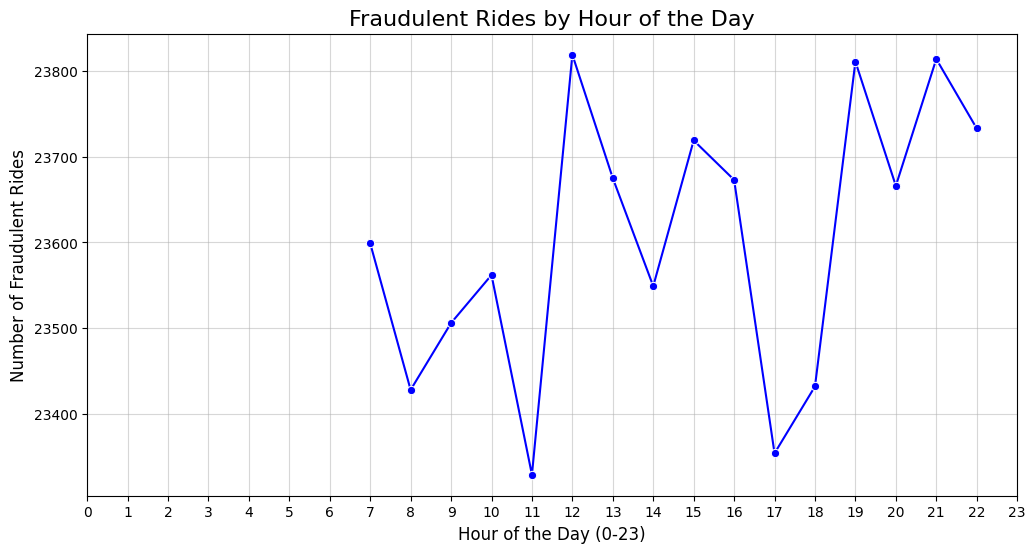

In [23]:
fraud_by_hour = df_fraud[df_fraud['fraud_flag']]['hour_of_day'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour.values, marker='o', color='blue')


plt.title("Fraudulent Rides by Hour of the Day", fontsize=16)
plt.xlabel("Hour of the Day (0-23)", fontsize=12)
plt.ylabel("Number of Fraudulent Rides", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(alpha=0.5)
plt.show()


## ساعت هایی مثل ۱۲،۱۹و۲۱ که بیشترین مقدار رو دارن احتمالا ساعت های پایانی چالش ها هستند

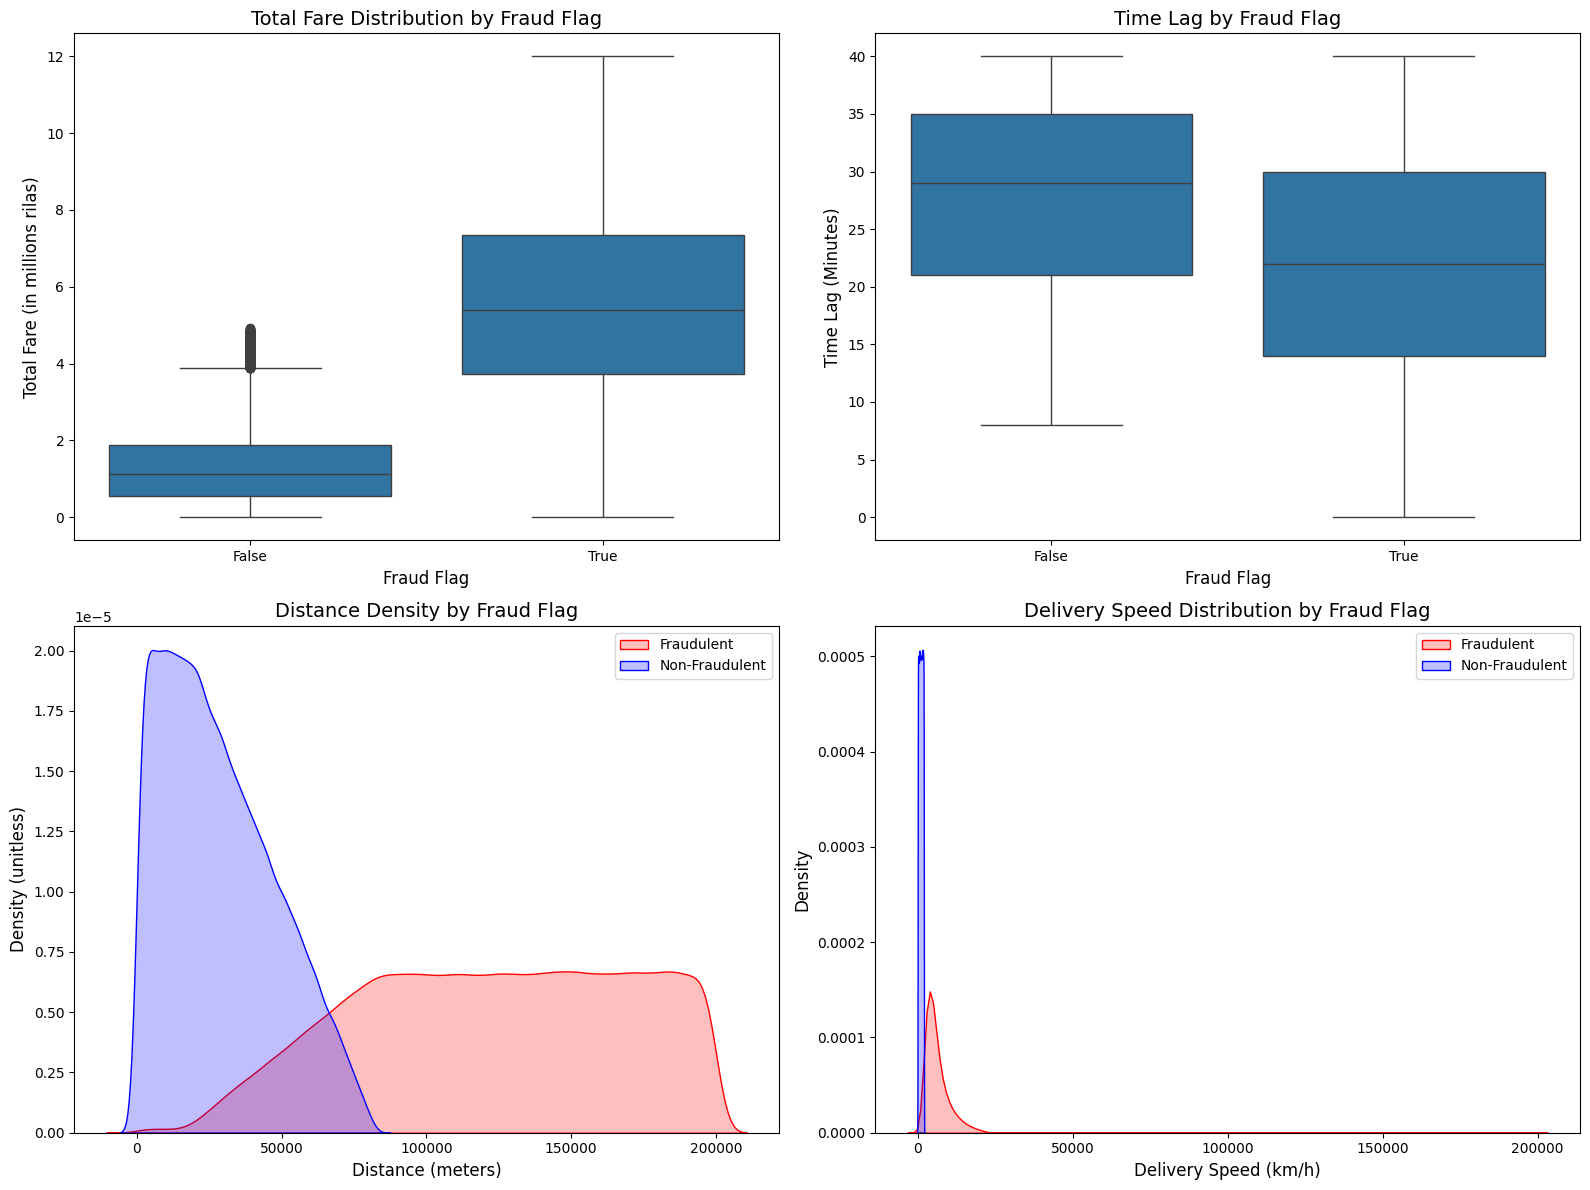

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(2, 2, figsize=(16, 12))

#  Plot 1: Total Fare Distribution by Fraud Flag
sns.boxplot(x='fraud_flag', y=df['total_fare'] / 1e6, data=df, ax=axes[0, 0])  # Convert to millions rials
axes[0, 0].set_title("Total Fare Distribution by Fraud Flag", fontsize=14)
axes[0, 0].set_xlabel("Fraud Flag", fontsize=12)
axes[0, 0].set_ylabel("Total Fare (in millions rilas)", fontsize=12)

#  Plot 2: Time Lag by Fraud Flag
sns.boxplot(x='fraud_flag', y='delivery_time_minutes', data=df, ax=axes[0, 1])
axes[0, 1].set_title("Time Lag by Fraud Flag", fontsize=14)
axes[0, 1].set_xlabel("Fraud Flag", fontsize=12)
axes[0, 1].set_ylabel("Time Lag (Minutes)", fontsize=12)

#  Plot 3: Distance Density by Fraud Flag
sns.kdeplot(df[df['fraud_flag']]['distance'], label='Fraudulent', shade=True, color='red', ax=axes[1, 0])
sns.kdeplot(df[~df['fraud_flag']]['distance'], label='Non-Fraudulent', shade=True, color='blue', ax=axes[1, 0])
axes[1, 0].set_title("Distance Density by Fraud Flag", fontsize=14)
axes[1, 0].set_xlabel("Distance (meters)", fontsize=12)
axes[1, 0].set_ylabel("Density (unitless)", fontsize=12)
axes[1, 0].legend()

#  Plot 4: Delivery Speed Distribution by Fraud Flag
df['delivery_speed'] = df['distance'] / (df['delivery_time_minutes'] + 1)  # Avoid division by zero
sns.kdeplot(df[df['fraud_flag']]['delivery_speed'], label='Fraudulent', shade=True, color='red', ax=axes[1, 1])
sns.kdeplot(df[~df['fraud_flag']]['delivery_speed'], label='Non-Fraudulent', shade=True, color='blue', ax=axes[1, 1])
axes[1, 1].set_title("Delivery Speed Distribution by Fraud Flag", fontsize=14)
axes[1, 1].set_xlabel("Delivery Speed (km/h)", fontsize=12)
axes[1, 1].set_ylabel("Density", fontsize=12)
axes[1, 1].legend()


plt.tight_layout()


plt.show()


#### **1. Total Fare Distribution by Fraud Flag (Top Left)**
- **Non-Fraudulent Orders**:
  - Median total fare is significantly lower, around 4 million rials.
  - Fewer extreme values, indicating consistency in pricing.
- **Fraudulent Orders**:
  - Median total fare is much higher, nearing 8 million rials.
  - A wider range of total fares suggests pricing anomalies or manipulation.

#### **2. Time Lag Between Acceptance and Delivery (Top Right)**
- **Non-Fraudulent Orders**:
  - Median delivery time is approximately 30 minutes.
  - Less variation in time lag compared to fraudulent orders.
- **Fraudulent Orders**:
  - Slightly lower median delivery time (around 25 minutes).
  - Greater variability, indicating potential manipulation in delivery time records.

#### **3. Distance Density by Fraud Flag (Bottom Left)**
- **Non-Fraudulent Orders**:
  - Peak density occurs at shorter distances (~10,000–50,000 meters).
  - Declines sharply for longer distances, consistent with typical delivery patterns.
- **Fraudulent Orders**:
  - Broader range of distances with significant density beyond 50,000 meters.
  - Indicating potential manipulation in long distances.

#### **4. Delivery Speed Distribution by Fraud Flag (Bottom Right)**
- **Non-Fraudulent Orders**:
  - Speeds are concentrated in realistic ranges, with few anomalies.
- **Fraudulent Orders**:
  - Significant density in unrealistic speed ranges (>100 km/h).
  - Reflects potential data manipulation or fraudulent bikers activites.

---

### **Insights**


1. **Delivery Time Variability**:
   - Fraudulent orders show greater variability in time lag, which may indicate tampering or attempts to meet incentive criteria.

2. **Distance and Speed Irregularities**:
   - Fraudulent orders often report unrealistic distances and speeds, potentially to inflate metrics for rewards or evade detection.

## چند نمونه از سرعت ها در تقلب ها و دیتاهای معمولی

In [26]:
# Top 10 delivery speeds in fraudulent data
top_fraud_speeds = df[df['fraud_flag']].sort_values(by='delivery_speed_kmh', ascending=False).head(10)
print("Top 10 Delivery Speeds in Fraudulent Data:")
print(top_fraud_speeds[['distance_km', 'delivery_time_minutes', 'delivery_speed_kmh']])

# Top 10 delivery speeds in non-fraudulent data
top_non_fraud_speeds = df[~df['fraud_flag']].sort_values(by='delivery_speed_kmh', ascending=False).head(10)
print("\nTop 10 Delivery Speeds in Non-Fraudulent Data:")
print(top_non_fraud_speeds[['biker_id','distance_km', 'delivery_time_minutes', 'delivery_speed_kmh']])


Top 10 Delivery Speeds in Fraudulent Data:
        distance_km  delivery_time_minutes  delivery_speed_kmh
124475      199.995                    0.0            11999.70
290688      199.984                    0.0            11999.04
174692      199.977                    0.0            11998.62
149997      199.945                    0.0            11996.70
393917      199.848                    0.0            11990.88
19645       199.833                    0.0            11989.98
295244      199.831                    0.0            11989.86
228047      199.817                    0.0            11989.02
246619      199.713                    0.0            11982.78
391073      199.707                    0.0            11982.42

Top 10 Delivery Speeds in Non-Fraudulent Data:
        biker_id  distance_km  delivery_time_minutes  delivery_speed_kmh
201324  60526934       68.000                   33.0          120.000000
160577  61096663       46.000                   22.0          120.0000

## در این قسمت احتمال تبانی کردن راننده ها باهم در نظر گرفته شده ، یعنی اینکه شماره یک راننده در قسمت مشتری اومده ، اما چون ممکنه اونا هم یه کاربر عادی باشن و از اسنپ باکس برای استفاده شخصی بهره ببرند فقط حالت هایی که بیشتر از یکبار تکرار شده رو در نظر گرفتم

In [27]:
# Create a DataFrame of all bikers and their phone numbers
biker_df = df[['biker_phone', 'biker_id']].rename(columns={'biker_phone': 'biker_phone_check'})

#Merge to compare each customer's phone with all other bikers' phone numbers
collaborative_df = df.merge(biker_df, how='left', left_on='customer_phone', right_on='biker_phone_check')

#Filter only valid collaborations (where collaborating biker ID is not NaN and biker IDs are different)
collaborative_df = collaborative_df[
    (collaborative_df['biker_id_x'] != collaborative_df['biker_id_y']) &
    collaborative_df['biker_id_y'].notna()
]


In [28]:
collaborative_df

,created_date,order_id,biker_id_x,accepted_at,delivered_at,distance,biker_phone,customer_phone,city,total_fare,...,delivery_time_hours,delivery_speed_kmh,unrealistic_speed,short_distance_anomaly,fraud_flag,day_of_month,month_of_year,delivery_speed,biker_phone_check,biker_id_y
4486,2024-07-03,8493664415,82720765,2024-07-03 09:14:22,2024-07-03 09:38:22,169291,9132196243,9412670211,tehran,10157460.0,...,0.416667,406.298400,True,False,True,3,7,6771.640000,9.412670e+09,94557919.0
5863,2024-02-12,8185419951,75893937,2024-02-12 14:24:20,2024-02-12 15:04:20,150325,9700034950,9758066678,tehran,9019500.0,...,0.683333,219.987805,True,False,True,12,2,3666.463415,9.758067e+09,88050211.0
8556,2024-08-03,1768487943,38265996,2024-08-03 13:14:34,2024-08-03 13:51:34,21629,9407509333,9682671590,ahvaz,865160.0,...,0.633333,34.151053,False,False,False,3,8,569.184211,9.682672e+09,79426707.0
9288,2024-11-19,1385711216,62512265,2024-11-19 22:13:39,2024-11-19 22:43:39,81948,9317222684,9319251598,karaj,4097400.0,...,0.516667,158.609032,True,False,True,19,11,2643.483871,9.319252e+09,89589289.0
15025,2024-03-05,7462012546,94916454,2024-03-05 12:47:37,2024-03-05 13:08:37,168192,9148460674,9372076153,ilam,5045760.0,...,0.366667,458.705455,True,False,True,5,3,7645.090909,9.372076e+09,41986621.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487371,2024-04-10,1582828441,44376758,2024-04-10 08:27:42,2024-04-10 08:48:42,119154,9909359312,9669073725,shiraz,5361930.0,...,0.366667,324.965455,True,False,True,10,4,5416.090909,9.669074e+09,91220603.0
487963,2024-02-08,3838102539,44430404,2024-02-08 15:53:41,2024-02-08 16:12:41,185458,9781913348,9887758904,isfahan,8716526.0,...,0.333333,556.374000,True,False,True,8,2,9272.900000,9.887759e+09,28864115.0
487968,2024-08-29,2290276805,53145513,2024-08-29 12:04:48,2024-08-29 12:28:48,51719,9839648579,9533214272,karaj,2585950.0,...,0.416667,124.125600,True,False,True,29,8,2068.760000,9.533214e+09,71111560.0
492049,2024-02-05,4494018814,26130063,2024-02-05 18:59:26,2024-02-05 19:13:26,54483,9300961642,9677624647,tehran,3268980.0,...,0.250000,217.932000,True,False,True,5,2,3632.200000,9.677625e+09,65618793.0


In [29]:
# Extract pairs of collaborating bikers
collaborating_pairs = collaborative_df[['biker_id_x', 'biker_id_y']].drop_duplicates()

# Rename columns for clarity
collaborating_pairs = collaborating_pairs.rename(columns={
    'biker_id_x': 'original_biker_id',
    'biker_id_y': 'collaborating_biker_id'
})

print("Collaborating Pairs of Bikers:")
print(collaborating_pairs)

Collaborating Pairs of Bikers:
        original_biker_id  collaborating_biker_id
4486             82720765              94557919.0
5863             75893937              88050211.0
8556             38265996              79426707.0
9288             62512265              89589289.0
15025            94916454              41986621.0
...                   ...                     ...
487371           44376758              91220603.0
487963           44430404              28864115.0
487968           53145513              71111560.0
492049           26130063              65618793.0
496178           99122418              43699625.0

[262 rows x 2 columns]


In [30]:
#Group by the pair of collaborating bikers and count occurrences
pair_counts = collaborative_df.groupby(['biker_id_x', 'biker_id_y']).size().reset_index(name='count')

# Filter pairs that happened more than once
frequent_pairs = pair_counts[pair_counts['count'] > 1]


print("Collaborating Pairs That Happened More Than Once:")
print(frequent_pairs)


Collaborating Pairs That Happened More Than Once:
     biker_id_x  biker_id_y  count
202    78861619  69636094.0      3


This cell is for checking biker's id

In [31]:
specific_biker_id = 'your_biker_id_here'

# Filter the rows for the specific biker ID
biker_rows = df[df['biker_id'] == 78861619.0]


biker_rows




,created_date,order_id,biker_id,accepted_at,delivered_at,distance,biker_phone,customer_phone,city,total_fare,...,unusual_delivery_time,distance_km,delivery_time_hours,delivery_speed_kmh,unrealistic_speed,short_distance_anomaly,fraud_flag,day_of_month,month_of_year,delivery_speed
68664,2024-10-06,1226719241,78861619,2024-10-06 20:54:22,2024-10-06 21:07:22,90085,9596593409,9168466210,ilam,2702550.0,...,False,90.085,0.233333,386.078571,True,False,True,6,10,6434.642857
249752,2024-10-06,4382202934,78861619,2024-10-06 22:20:48,2024-10-06 22:20:48,114183,9449980218,9168466210,ilam,3425490.0,...,True,114.183,0.016667,6850.980000,True,False,True,6,10,114183.000000
357036,2024-10-06,5024340796,78861619,2024-10-06 12:31:02,2024-10-06 13:04:02,846,9954887717,9168466210,ilam,25380.0,...,False,0.846,0.566667,1.492941,False,False,False,6,10,24.882353


## در اینجا این راننده سه بار با یک شماره سفارش داشته که اون شماره  متعلق به یک راننده دیگر است ، البته اینکه یک راننده سه شماره تلفن مختلف با یک آیدی دارد کمی صحت دیتارو زیر سوال میبره ولی ما درنظر میگیریم دیتا سالم است


# **Conclusion**
### The alignment of unrealistic delivery speeds and collaboration with prize campaigns suggests a potential misuse of the incentive structure. While prizes are a powerful motivational tool, implementing stricter data validation and monitoring mechanisms can ensure fairness and reduce fraud risks.